In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score


In [197]:
ds=pd.read_csv("flights.csv",low_memory=False)
ds1=ds.head(110000)
ds1

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0       2015      1    1            4      AS             98      N407AS   
1       2015      1    1            4      AA           2336      N3KUAA   
2       2015      1    1            4      US            840      N171US   
3       2015      1    1            4      AA            258      N3HYAA   
4       2015      1    1            4      AS            135      N527AS   
...      ...    ...  ...          ...     ...            ...         ...   
109995  2015      1    8            4      OO           7365      N457SW   
109996  2015      1    8            4      US           1724      N957UW   
109997  2015      1    8            4      UA            468      N481UA   
109998  2015      1    8            4      UA           1487      N66831   
109999  2015      1    8            4      US            425      N569UW   

       ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  ...  \
0                 ANC                 SEA                    5  ...   
1                 LAX                 PBI                   10  ...   
2                 SFO                 CLT                   20  ...   
3                 LAX                 MIA                   20  ...   
4                 SEA                 ANC                   25  ...   
...               ...                 ...                  ...  ...   
109995            ABR                 MSP                  515  ...   
109996            RDU                 PHL                  519  ...   
109997            SEA                 SFO                  520  ...   
109998            PHL                 IAH                  520  ...   
109999            PDX                 PHX                  520  ...   

        ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0              408.0          -22.0         0          0                  NaN   
1              741.0           -9.0         0          0                  NaN   
2              811.0            5.0         0          0                  NaN   
3              756.0           -9.0         0          0                  NaN   
4              259.0          -21.0         0          0                  NaN   
...              ...            ...       ...        ...                  ...   
109995         556.0          -27.0         0          0                  NaN   
109996         622.0          -13.0         0          0                  NaN   
109997         718.0          -19.0         0          0                  NaN   
109998         756.0          -18.0         0          0                  NaN   
109999         838.0          -12.0         0          0                  NaN   

        AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0                    NaN             NaN            NaN                  NaN   
1                    NaN             NaN            NaN                  NaN   
2                    NaN             NaN            NaN                  NaN   
3                    NaN             NaN            NaN                  NaN   
4                    NaN             NaN            NaN                  NaN   
...                  ...             ...            ...                  ...   
109995               NaN             NaN            NaN                  NaN   
109996               NaN             NaN            NaN                  NaN   
109997               NaN             NaN            NaN                  NaN   
109998               NaN             NaN            NaN                  NaN   
109999               NaN             NaN            NaN                  NaN   

        WEATHER_DELAY  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
109995            NaN  
109996            NaN  
109997            NaN  
109998            NaN  
109999            NaN  

[110000 rows x 31 c

In [198]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110000 entries, 0 to 109999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 110000 non-null  int64  
 1   MONTH                110000 non-null  int64  
 2   DAY                  110000 non-null  int64  
 3   DAY_OF_WEEK          110000 non-null  int64  
 4   AIRLINE              110000 non-null  object 
 5   FLIGHT_NUMBER        110000 non-null  int64  
 6   TAIL_NUMBER          109810 non-null  object 
 7   ORIGIN_AIRPORT       110000 non-null  object 
 8   DESTINATION_AIRPORT  110000 non-null  object 
 9   SCHEDULED_DEPARTURE  110000 non-null  int64  
 10  DEPARTURE_TIME       107479 non-null  float64
 11  DEPARTURE_DELAY      107479 non-null  float64
 12  TAXI_OUT             107405 non-null  float64
 13  WHEELS_OFF           107405 non-null  float64
 14  SCHEDULED_TIME       110000 non-null  float64
 15  ELAPSED_TIME     

In [199]:
ds1.DIVERTED.value_counts()

0    109749
1       251
Name: DIVERTED, dtype: int64

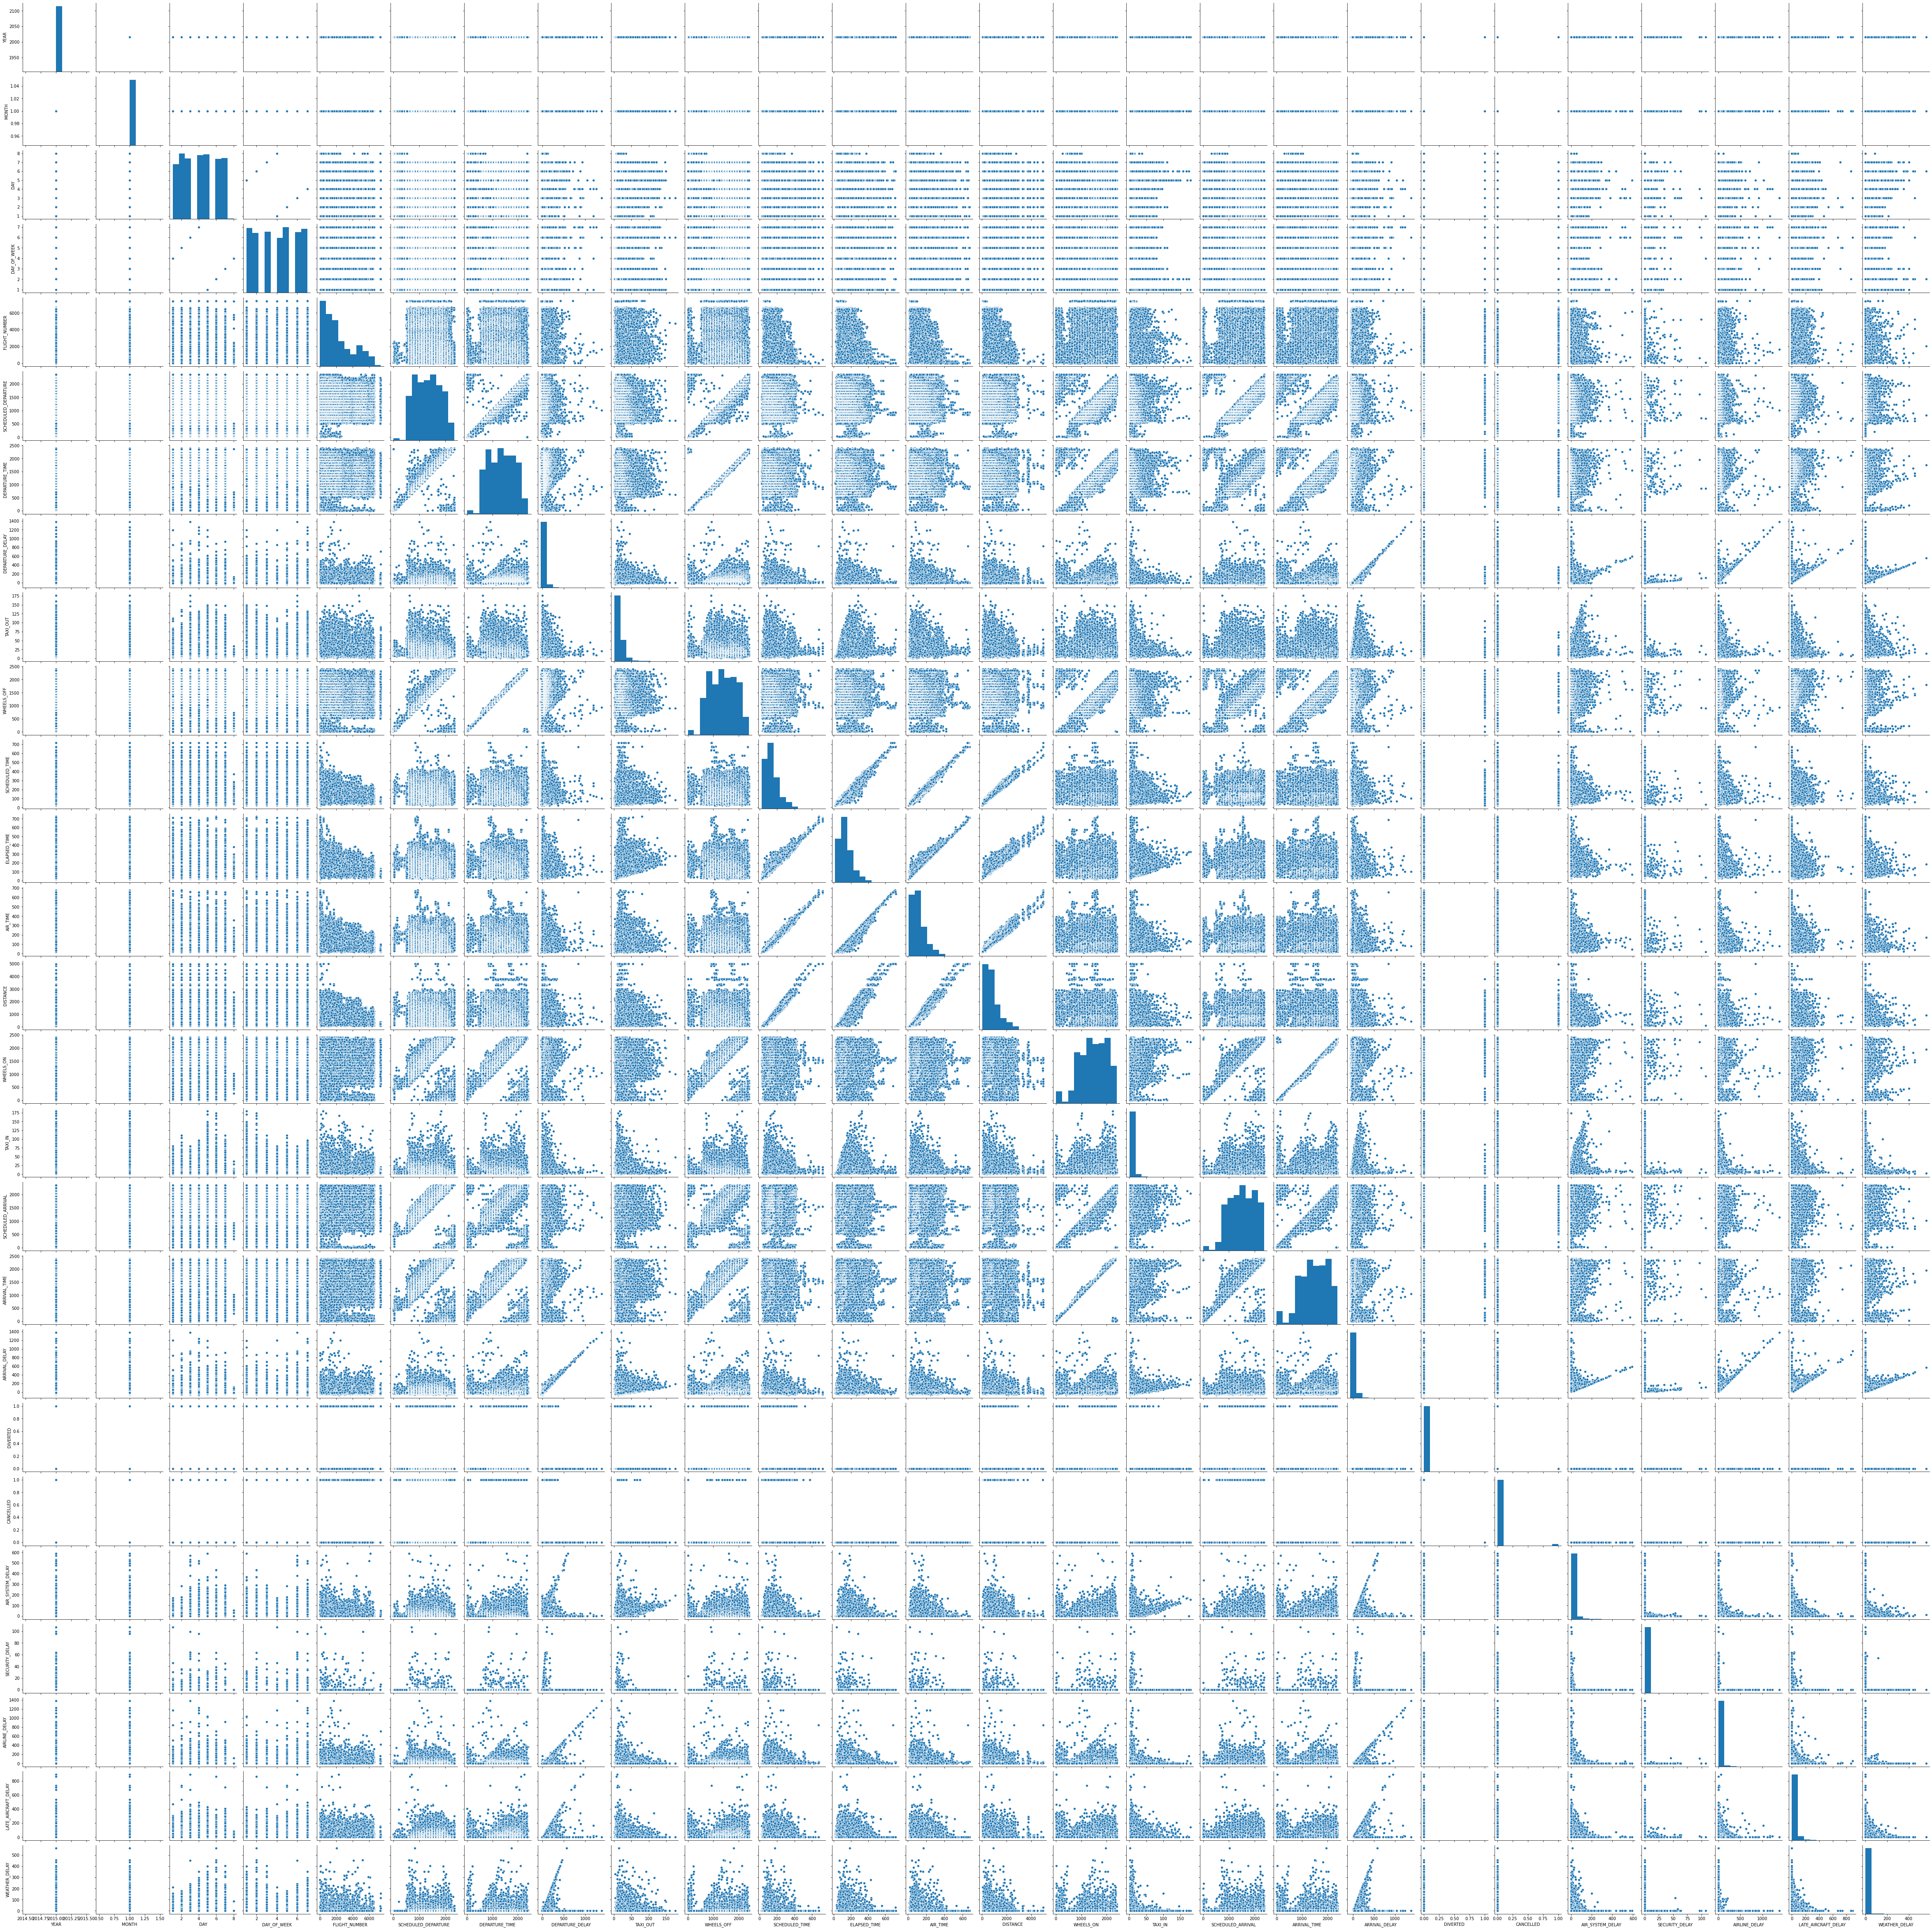

In [200]:
sns.pairplot(ds1)

In [201]:
ds1.corr()

YEAR  MONTH       DAY  DAY_OF_WEEK  FLIGHT_NUMBER  \
YEAR                  NaN    NaN       NaN          NaN            NaN   
MONTH                 NaN    NaN       NaN          NaN            NaN   
DAY                   NaN    NaN  1.000000    -0.505519       0.004365   
DAY_OF_WEEK           NaN    NaN -0.505519     1.000000       0.009890   
FLIGHT_NUMBER         NaN    NaN  0.004365     0.009890       1.000000   
SCHEDULED_DEPARTURE   NaN    NaN -0.033273     0.015885      -0.003418   
DEPARTURE_TIME        NaN    NaN -0.024480     0.015149       0.009129   
DEPARTURE_DELAY       NaN    NaN  0.043923     0.055154       0.033666   
TAXI_OUT              NaN    NaN  0.067258     0.010772       0.062142   
WHEELS_OFF            NaN    NaN -0.021048     0.014269       0.015801   
SCHEDULED_TIME        NaN    NaN -0.034236     0.022896      -0.336625   
ELAPSED_TIME          NaN    NaN -0.031485     0.032927      -0.318083   
AIR_TIME              NaN    NaN -0.044899     0.033984      -0.338536   
DISTANCE              NaN    NaN -0.041399     0.027500      -0.354899   
WHEELS_ON             NaN    NaN -0.009926    -0.011197      -0.001865   
TAXI_IN               NaN    NaN  0.027601    -0.015586       0.015185   
SCHEDULED_ARRIVAL     NaN    NaN -0.018344     0.004382      -0.017203   
ARRIVAL_TIME          NaN    NaN -0.007451    -0.013007       0.002432   
ARRIVAL_DELAY         NaN    NaN  0.048571     0.067910       0.055853   
DIVERTED              NaN    NaN  0.005420    -0.001022       0.007350   
CANCELLED             NaN    NaN -0.005806    -0.005872       0.087481   
AIR_SYSTEM_DELAY      NaN    NaN  0.076534    -0.016632      -0.036687   
SECURITY_DELAY        NaN    NaN -0.010839     0.008500      -0.006987   
AIRLINE_DELAY         NaN    NaN -0.015643     0.008576       0.019968   
LATE_AIRCRAFT_DELAY   NaN    NaN  0.030638     0.031080       0.082187   
WEATHER_DELAY         NaN    NaN  0.060477    -0.050659       0.005743   

                     SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY  \
YEAR                                 NaN             NaN              NaN   
MONTH                                NaN             NaN              NaN   
DAY                            -0.033273       -0.024480         0.043923   
DAY_OF_WEEK                     0.015885        0.015149         0.055154   
FLIGHT_NUMBER                  -0.003418        0.009129         0.033666   
SCHEDULED_DEPARTURE             1.000000        0.944779         0.160224   
DEPARTURE_TIME                  0.944779        1.000000         0.232080   
DEPARTURE_DELAY                 0.160224        0.232080         1.000000   
TAXI_OUT                       -0.080179       -0.069117         0.063656   
WHEELS_OFF                      0.913536        0.966036         0.219789   
SCHEDULED_TIME                 -0.024142       -0.035170         0.008400   
ELAPSED_TIME                   -0.031232       -0.039872         0.017588   
AIR_TIME                       -0.017852       -0.029351         0.004589   
DISTANCE                       -0.005243       -0.020959         0.006194   
WHEELS_ON                       0.584124        0.615384         0.079442   
TAXI_IN                        -0.027901       -0.018031         0.043624   
SCHEDULED_ARRIVAL               0.726454        0.729447         0.143173   
ARRIVAL_TIME                    0.550994        0.580988         0.067640   
ARRIVAL_DELAY                   0.140184        0.210665         0.950361   
DIVERTED                        0.002961        0.007052         0.021286   
CANCELLED                      -0.001286        0.008096         0.029334   
AIR_SYSTEM_DELAY               -0.109587       -0.091751         0.089799   
SECURITY_DELAY                 -0.018699       -0.013602         0.007592   
AIRLINE_DELAY                  -0.054716       -0.014969         0.597163   
LATE_AIRCRAFT_DELAY             0.174379        0.237350         0.609452   
WEATHER_DELAY       

In [202]:
ds1.isnull().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
TAIL_NUMBER               190
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME           2521
DEPARTURE_DELAY          2521
TAXI_OUT                 2595
WHEELS_OFF               2595
SCHEDULED_TIME              0
ELAPSED_TIME             2871
AIR_TIME                 2871
DISTANCE                    0
WHEELS_ON                2681
TAXI_IN                  2681
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             2681
ARRIVAL_DELAY            2871
DIVERTED                    0
CANCELLED                   0
CANCELLATION_REASON    107380
AIR_SYSTEM_DELAY        72293
SECURITY_DELAY          72293
AIRLINE_DELAY           72293
LATE_AIRCRAFT_DELAY     72293
WEATHER_DELAY           72293
dtype: int64

In [203]:
ds2=ds1.drop(['YEAR','AIRLINE','DISTANCE','SCHEDULED_TIME','FLIGHT_NUMBER','TAIL_NUMBER','TAXI_OUT','WHEELS_OFF','AIR_TIME','ELAPSED_TIME','DEPARTURE_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','CANCELLATION_REASON','ARRIVAL_TIME'],axis='columns')

In [204]:
ds2

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0           1    1            ANC                 SEA                    5   
1           1    1            LAX                 PBI                   10   
2           1    1            SFO                 CLT                   20   
3           1    1            LAX                 MIA                   20   
4           1    1            SEA                 ANC                   25   
...       ...  ...            ...                 ...                  ...   
109995      1    8            ABR                 MSP                  515   
109996      1    8            RDU                 PHL                  519   
109997      1    8            SEA                 SFO                  520   
109998      1    8            PHL                 IAH                  520   
109999      1    8            PDX                 PHX                  520   

        DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  DIVERTED  \
0                 -11.0                430          -22.0         0   
1                  -8.0                750           -9.0         0   
2                  -2.0                806            5.0         0   
3                  -5.0                805           -9.0         0   
4                  -1.0                320          -21.0         0   
...                 ...                ...            ...       ...   
109995            -10.0                623          -27.0         0   
109996             -9.0                635          -13.0         0   
109997             -7.0                737          -19.0         0   
109998              7.0                814          -18.0         0   
109999             -3.0                850          -12.0         0   

        CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0               0               NaN             NaN            NaN   
1               0               NaN             NaN            NaN   
2               0               NaN             NaN            NaN   
3               0               NaN             NaN            NaN   
4               0               NaN             NaN            NaN   
...           ...               ...             ...            ...   
109995          0               NaN             NaN            NaN   
109996          0               NaN             NaN            NaN   
109997          0               NaN             NaN            NaN   
109998          0               NaN             NaN            NaN   
109999          0               NaN             NaN            NaN   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
0                       NaN            NaN  
1                       NaN            NaN  
2                       NaN            NaN  
3                       NaN            NaN  
4                       NaN            NaN  
...                     ...            ...  
109995                  NaN            NaN  
109996                  NaN            NaN  
109997                  NaN            NaN  
109998                  NaN            NaN  
109999                  NaN            NaN  

[110000 rows x 15 columns]

In [205]:
ds3=ds2.fillna(ds2.mean())

In [206]:
ds3.isnull().sum()

MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

In [207]:
ds3.head(100)

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0       1    1            ANC                 SEA                    5   
1       1    1            LAX                 PBI                   10   
2       1    1            SFO                 CLT                   20   
3       1    1            LAX                 MIA                   20   
4       1    1            SEA                 ANC                   25   
..    ...  ...            ...                 ...                  ...   
95      1    1            BUF                 JFK                  535   
96      1    1            PWM                 JFK                  535   
97      1    1            JFK                 SJU                  535   
98      1    1            CRP                 IAH                  535   
99      1    1            PIA                 DTW                  535   

    DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  DIVERTED  CANCELLED  \
0             -11.0                430          -22.0         0          0   
1              -8.0                750           -9.0         0          0   
2              -2.0                806            5.0         0          0   
3              -5.0                805           -9.0         0          0   
4              -1.0                320          -21.0         0          0   
..              ...                ...            ...       ...        ...   
95             -5.0                703          -15.0         0          0   
96             -7.0                700          -25.0         0          0   
97             43.0               1020           19.0         0          0   
98            -12.0                636          -21.0         0          0   
99             -5.0                803          -18.0         0          0   

    AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0          13.938897        0.068953      17.479407            26.083406   
1          13.938897        0.068953      17.479407            26.083406   
2          13.938897        0.068953      17.479407            26.083406   
3          13.938897        0.068953      17.479407            26.083406   
4          13.938897        0.068953      17.479407            26.083406   
..               ...             ...            ...                  ...   
95         13.938897        0.068953      17.479407            26.083406   
96         13.938897        0.068953      17.479407            26.083406   
97          0.000000        0.000000      19.000000             0.000000   
98         13.938897        0.068953      17.479407            26.083406   
99         13.938897        0.068953      17.479407            26.083406   

    WEATHER_DELAY  
0        2.848967  
1        2.848967  
2        2.848967  
3        2.848967  
4        2.848967  
..            ...  
95       2.848967  
96       2.848967  
97       0.000000  
98       2.848967  
99       2.848967  

[100 rows x 15 columns]

In [208]:
ds3[ds3.ARRIVAL_DELAY>10].shape

(45640, 15)

In [209]:
ds3.shape

(110000, 15)

In [210]:
def result_feature(x):
    if x>11:
        return 1
    else:
        return 0

In [211]:
ds3['result']=ds3.ARRIVAL_DELAY.apply(result_feature)

In [212]:
ds3

MONTH  DAY ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0           1    1            ANC                 SEA                    5   
1           1    1            LAX                 PBI                   10   
2           1    1            SFO                 CLT                   20   
3           1    1            LAX                 MIA                   20   
4           1    1            SEA                 ANC                   25   
...       ...  ...            ...                 ...                  ...   
109995      1    8            ABR                 MSP                  515   
109996      1    8            RDU                 PHL                  519   
109997      1    8            SEA                 SFO                  520   
109998      1    8            PHL                 IAH                  520   
109999      1    8            PDX                 PHX                  520   

        DEPARTURE_DELAY  SCHEDULED_ARRIVAL  ARRIVAL_DELAY  DIVERTED  \
0                 -11.0                430          -22.0         0   
1                  -8.0                750           -9.0         0   
2                  -2.0                806            5.0         0   
3                  -5.0                805           -9.0         0   
4                  -1.0                320          -21.0         0   
...                 ...                ...            ...       ...   
109995            -10.0                623          -27.0         0   
109996             -9.0                635          -13.0         0   
109997             -7.0                737          -19.0         0   
109998              7.0                814          -18.0         0   
109999             -3.0                850          -12.0         0   

        CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0               0         13.938897        0.068953      17.479407   
1               0         13.938897        0.068953      17.479407   
2               0         13.938897        0.068953      17.479407   
3               0         13.938897        0.068953      17.479407   
4               0         13.938897        0.068953      17.479407   
...           ...               ...             ...            ...   
109995          0         13.938897        0.068953      17.479407   
109996          0         13.938897        0.068953      17.479407   
109997          0         13.938897        0.068953      17.479407   
109998          0         13.938897        0.068953      17.479407   
109999          0         13.938897        0.068953      17.479407   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  result  
0                 26.083406       2.848967       0  
1                 26.083406       2.848967       0  
2                 26.083406       2.848967       0  
3                 26.083406       2.848967       0  
4                 26.083406       2.848967       0  
...                     ...            ...     ...  
109995            26.083406       2.848967       0  
109996            26.083406       2.848967       0  
109997            26.083406       2.848967       0  
109998            26.083406       2.848967       0  
109999            26.083406       2.848967       0  

[110000 rows x 16 columns]

In [213]:
ds3[ds3.result>0].shape

(44268, 16)

In [214]:
ds4=ds3.drop(['ARRIVAL_DELAY','DESTINATION_AIRPORT','ORIGIN_AIRPORT'],axis='columns')
ds4

MONTH  DAY  SCHEDULED_DEPARTURE  DEPARTURE_DELAY  SCHEDULED_ARRIVAL  \
0           1    1                    5            -11.0                430   
1           1    1                   10             -8.0                750   
2           1    1                   20             -2.0                806   
3           1    1                   20             -5.0                805   
4           1    1                   25             -1.0                320   
...       ...  ...                  ...              ...                ...   
109995      1    8                  515            -10.0                623   
109996      1    8                  519             -9.0                635   
109997      1    8                  520             -7.0                737   
109998      1    8                  520              7.0                814   
109999      1    8                  520             -3.0                850   

        DIVERTED  CANCELLED  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
0              0          0         13.938897        0.068953      17.479407   
1              0          0         13.938897        0.068953      17.479407   
2              0          0         13.938897        0.068953      17.479407   
3              0          0         13.938897        0.068953      17.479407   
4              0          0         13.938897        0.068953      17.479407   
...          ...        ...               ...             ...            ...   
109995         0          0         13.938897        0.068953      17.479407   
109996         0          0         13.938897        0.068953      17.479407   
109997         0          0         13.938897        0.068953      17.479407   
109998         0          0         13.938897        0.068953      17.479407   
109999         0          0         13.938897        0.068953      17.479407   

        LATE_AIRCRAFT_DELAY  WEATHER_DELAY  result  
0                 26.083406       2.848967       0  
1                 26.083406       2.848967       0  
2                 26.083406       2.848967       0  
3                 26.083406       2.848967       0  
4                 26.083406       2.848967       0  
...                     ...            ...     ...  
109995            26.083406       2.848967       0  
109996            26.083406       2.848967       0  
109997            26.083406       2.848967       0  
109998            26.083406       2.848967       0  
109999            26.083406       2.848967       0  

[110000 rows x 13 columns]

In [215]:
X = ds4.iloc[:, :-1].values
y = ds4.iloc[:, -1].values

In [216]:
print(y)

[0 0 0 ... 0 0 0]


In [217]:
from sklearn.model_selection import train_test_split


In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [219]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [220]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [221]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)


In [222]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [223]:
from sklearn.metrics import roc_auc_score,confusion_matrix, accuracy_score
y_pred=classifier.predict(X_test)

In [224]:
cross_val_score(DecisionTreeClassifier(criterion = 'entropy', random_state = 0),X_train,y_train)

array([0.93727273, 0.94006494, 0.9388961 , 0.93727273, 0.93720779])

In [225]:
print(roc_auc_score(y_pred,y_test))

0.934917018781965


In [226]:

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[18599  1109]
 [  934 12358]]


In [227]:
accuracy_score(y_test, y_pred)

0.9380909090909091